In [1]:
import numpy as np
import torch

In [2]:
sample_per_carpet = 20

# 1. Lectura de archivos

## Funciones de Lectura de archivos

In [3]:
def read_cloud_csv(file):
    #Leer todo el archivo y saltamos el encabezado del archivo
    data = np.loadtxt(file, delimiter=',', skiprows=1)

    # Separar la primera línea de los datos que son las posiciones
    first_row_data = data[0, :]     #Posiciones del robot
    rest_data = data[1:, :]         #Nube de puntos

    #first_row_data, rest_data[:5]  #Mostramos la posicion y las primeras 5 del resto para verificar

    return first_row_data[::-1], rest_data

In [4]:
import os

def get_positions_and_cloud_points(sample_per_carpet):

    Posiciones_robot = []
    Nubes = []

    # Define la dirección (ruta) en la que deseas buscar los directorios
    ruta = 'Nubes'

    Elementos_en_orden = []
    for i in range(82):
        caso1= "mundo_"+str(i)
        Elementos_en_orden.append(caso1)
        caso2= "mundo_"+str(i)+"_1"
        Elementos_en_orden.append(caso2)

    # Lista todos los archivos y directorios en la ruta especificada
    todos_los_elementos = os.listdir(ruta)

    # Filtra solo los directorios
    solo_directorios = [elemento for elemento in todos_los_elementos if os.path.isdir(os.path.join(ruta, elemento))]

    Directorios_nubes = []
    for n in Elementos_en_orden:
        if n in solo_directorios:
            Directorios_nubes.append(n)


    inicio = 0
    for directorio in Directorios_nubes:

        ruta_directorio = ruta+"/"+directorio

        print(ruta_directorio, "inicio:", inicio)

        #Lista todos los archivos y directorios en la ruta especificada
        len_nombres_nubes = len(os.listdir(ruta_directorio))

        nombres_nubes = []
        for i in range(len_nombres_nubes):
            nombres_nubes.append("intersection_points_"+str(i)+".csv")
            
        #Tomamos una muestra por cada carpeta
        rand_index = [i for i in np.random.randint(0, len_nombres_nubes, sample_per_carpet)]

        nombres_nubes= [nombres_nubes[i] for i in np.sort(rand_index)]

        for nube in nombres_nubes:

            ruta_nubes = ruta_directorio +"/"+nube
            #Obtenemos a: la posicion y b: la nube de puntos
            a,b = read_cloud_csv(ruta_nubes)

            #!!!Si hay un valor infinito en la nube de puntos no la incluimos en nuestro conjunto
            if(np.any(np.isinf(b)) == False):
                Posiciones_robot.append(a)
                Nubes.append(b)
                inicio +=1
        

    Posiciones_robot= np.array(Posiciones_robot)

    return Posiciones_robot, Nubes

## Lectura

In [5]:
Posiciones_robot, Nubes = get_positions_and_cloud_points(sample_per_carpet)

Nubes/mundo_0 inicio: 0
Nubes/mundo_1 inicio: 19
Nubes/mundo_2 inicio: 36
Nubes/mundo_2_1 inicio: 53
Nubes/mundo_3 inicio: 53
Nubes/mundo_3_1 inicio: 70
Nubes/mundo_4 inicio: 70
Nubes/mundo_4_1 inicio: 90
Nubes/mundo_5 inicio: 90
Nubes/mundo_5_1 inicio: 110
Nubes/mundo_6 inicio: 110
Nubes/mundo_7 inicio: 110
Nubes/mundo_8 inicio: 110
Nubes/mundo_9 inicio: 110
Nubes/mundo_10 inicio: 110
Nubes/mundo_11 inicio: 110
Nubes/mundo_12 inicio: 110
Nubes/mundo_13 inicio: 110
Nubes/mundo_13_1 inicio: 126
Nubes/mundo_14 inicio: 126
Nubes/mundo_14_1 inicio: 138
Nubes/mundo_15 inicio: 138
Nubes/mundo_15_1 inicio: 149
Nubes/mundo_16 inicio: 149
Nubes/mundo_16_1 inicio: 165
Nubes/mundo_17 inicio: 165
Nubes/mundo_17_1 inicio: 173
Nubes/mundo_18 inicio: 173
Nubes/mundo_18_1 inicio: 180
Nubes/mundo_19 inicio: 180
Nubes/mundo_19_1 inicio: 189
Nubes/mundo_20 inicio: 189
Nubes/mundo_20_1 inicio: 194
Nubes/mundo_21 inicio: 194
Nubes/mundo_21_1 inicio: 202
Nubes/mundo_22 inicio: 202
Nubes/mundo_22_1 inicio: 2

# 2. 

In [6]:
len(Posiciones_robot)

892

In [7]:
len(Nubes[0])

640

In [8]:
len(Nubes)

892

# 3. Medidas de Similitud

In [9]:
def mean_squared_error(nube1, nube2):
    return np.sum( (nube1[:,0] - nube2[:,0]) ** 2 + (nube1[:,1] - nube2[:,1]) ** 2) / len(nube1)

# 4. Aplicando Similitud

Ejemplo de similitud entre la nube 0 y la nube 1

In [10]:
mean_squared_error(Nubes[0],Nubes[1])

0.0

Calculo de Similitud para cada nube con el resto de nubes

In [11]:
Nubes_Similitud = np.zeros((len(Nubes),len(Nubes)))

max_value = 0

for i in range(len(Nubes)):
    if(i%100 == 0):
            print(i,"/",len(Nubes_Similitud))
    for j in range(len(Nubes)):
        Nubes_Similitud[i][j] = mean_squared_error(Nubes[i], Nubes[j])
        
    max_value = max(np.max(Nubes_Similitud[i]), max_value)

print(max_value)

0 / 892
100 / 892
200 / 892
300 / 892
400 / 892
500 / 892
600 / 892
700 / 892
800 / 892
33.69342352225289


Función para obtener el top x de nubes de puntos y sus valores de similitud

In [12]:
def print_similitud_de_nube(num_cloud, num_top):

    sort_index = np.argsort(Nubes_Similitud[num_cloud])
    sort_values = np.sort(Nubes_Similitud[num_cloud])

    print("Top ", num_top, " de las nubes de mayor similitud de la nube ", num_cloud)
    print("-"*25)
    for i in range(num_top):
        print("Indice nube: ",sort_index[i], "\t Valor de Similitud: ",sort_values[i])
    
    #Devolvemos los indices y valores ordenados de mayor similitud a menor similitud
    #return sort_index, sort_values

Ejemplo para la nube 1 de las nubes con mayor similitud y sus valores de similitud

In [13]:
print_similitud_de_nube(1, 10)

Top  10  de las nubes de mayor similitud de la nube  1
-------------------------
Indice nube:  0 	 Valor de Similitud:  0.0
Indice nube:  1 	 Valor de Similitud:  0.0
Indice nube:  2 	 Valor de Similitud:  1.7186989093031713e-08
Indice nube:  3 	 Valor de Similitud:  1.015197750956491e-05
Indice nube:  4 	 Valor de Similitud:  0.02493505092983333
Indice nube:  5 	 Valor de Similitud:  0.08970768923742048
Indice nube:  20 	 Valor de Similitud:  0.17701433282165732
Indice nube:  19 	 Valor de Similitud:  0.17701433282165732
Indice nube:  21 	 Valor de Similitud:  0.2711644665315041
Indice nube:  6 	 Valor de Similitud:  0.31636940505224503


# 5. Construcción de los buenos ejemplos y malos ejemplos

In [14]:
def get_good_and_bad_samples(Nubes_Similitud, k, n):

    Good_Samples = []
    Bad_Samples = []

    for i in range(len(Nubes_Similitud)):
        if(i%100 == 0):
            print(i,"/",len(Nubes_Similitud))
            
        #Valores ordenados de menor a mayor
        sort_index = np.argsort(Nubes_Similitud[i])
        #sort_values = np.sort(Nubes_Similitud[i])

        #print([[i,j] for i,j in zip(np.ones(k, dtype=int)*i,sort_index[:k])])

        for nn in range(n):
            #[i,gs]
            Good_Samples.append([[i,j] for i,j in zip(np.ones(k, dtype=int)*i,sort_index[nn:nn+k])])
            #[i,bs]
            Bad_Samples.append([[i,j] for i,j in zip(np.ones(k, dtype=int)*i,(sort_index[::-1])[nn:nn+k])])

    return Good_Samples, Bad_Samples


Valor K para seleccionar K buenos ejemplos y K malos ejemplos

In [15]:
K = 50

In [16]:
Good_Samples, Bad_Samples = get_good_and_bad_samples(Nubes_Similitud, K,12)

0 / 892


100 / 892
200 / 892
300 / 892
400 / 892
500 / 892
600 / 892
700 / 892
800 / 892


Vista de los Buenos ejemplos y los Malos ejemplos

In [17]:
print(Good_Samples[0])
print(Bad_Samples[0])
print("-------")
print(Good_Samples[3])
print(Bad_Samples[3])

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 20], [0, 19], [0, 21], [0, 6], [0, 37], [0, 36], [0, 22], [0, 23], [0, 7], [0, 38], [0, 39], [0, 8], [0, 53], [0, 54], [0, 55], [0, 40], [0, 41], [0, 24], [0, 56], [0, 25], [0, 42], [0, 57], [0, 58], [0, 9], [0, 26], [0, 59], [0, 91], [0, 92], [0, 90], [0, 70], [0, 71], [0, 43], [0, 28], [0, 27], [0, 60], [0, 61], [0, 72], [0, 10], [0, 73], [0, 93], [0, 74], [0, 94], [0, 95], [0, 29]]
[[0, 345], [0, 374], [0, 307], [0, 373], [0, 344], [0, 343], [0, 372], [0, 362], [0, 361], [0, 276], [0, 326], [0, 306], [0, 275], [0, 385], [0, 274], [0, 273], [0, 305], [0, 258], [0, 272], [0, 238], [0, 257], [0, 371], [0, 255], [0, 256], [0, 290], [0, 304], [0, 342], [0, 271], [0, 237], [0, 303], [0, 289], [0, 288], [0, 360], [0, 223], [0, 222], [0, 287], [0, 340], [0, 341], [0, 286], [0, 212], [0, 211], [0, 221], [0, 384], [0, 236], [0, 210], [0, 359], [0, 254], [0, 383], [0, 209], [0, 270]]
-------
[[0, 3], [0, 4], [0, 5], [0, 20], [0, 19], [0, 21]

# 6. Construcción del Conjunto de Entrenamiento y de Validación

Tomamos un 80% de conjunto de entrenamiento y 20% de conjunto de validación

In [18]:
from sklearn.model_selection import train_test_split

Good_Samples_train,Good_Samples_val,Bad_Samples_train,Bad_Samples_val = train_test_split(Good_Samples, Bad_Samples, test_size=0.2)

print("GS_Train size:", len(Good_Samples_train))
print("GS_Val   size:", len(Good_Samples_val))
print("BS_Train size:", len(Bad_Samples_train))
print("BS_Val   size:", len(Bad_Samples_val))

GS_Train size: 8563
GS_Val   size: 2141
BS_Train size: 8563
BS_Val   size: 2141


In [89]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 16
num_workers = 2

#Entrenamiento
train_dataset = TensorDataset(torch.tensor([ [p[0] for p in pos_pairs]+ [p[0] for p in neg_pairs] for pos_pairs, neg_pairs in zip(Good_Samples_train, Bad_Samples_train) ],dtype=torch.int), #Cloud
                              torch.tensor([ [p[1] for p in pos_pairs]+ [p[1] for p in neg_pairs] for pos_pairs, neg_pairs in zip(Good_Samples_train, Bad_Samples_train) ],dtype=torch.int), #Context
                              torch.tensor([[1]*(len(pos_pairs)) + [0]*(len(neg_pairs)) for pos_pairs, neg_pairs in zip(Good_Samples_train, Bad_Samples_train)] , dtype=torch.float ))

train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          num_workers=num_workers,
                          shuffle=True)

#Validacion
val_dataset = TensorDataset(torch.tensor([ [p[0] for p in pos_pairs]+ [p[0] for p in neg_pairs] for pos_pairs, neg_pairs in zip(Good_Samples_val, Bad_Samples_val) ],dtype=torch.int), #Cloud
                              torch.tensor([ [p[1] for p in pos_pairs]+ [p[1] for p in neg_pairs] for pos_pairs, neg_pairs in zip(Good_Samples_val, Bad_Samples_val) ],dtype=torch.int), #Context
                              torch.tensor([[1]*(len(pos_pairs))+ [0]*(len(neg_pairs)) for pos_pairs, neg_pairs in zip(Good_Samples_val, Bad_Samples_val)] , dtype=torch.float ))

val_loader = DataLoader(val_dataset,
                          batch_size=batch_size,
                          num_workers=num_workers,
                          shuffle=False)


Tamaño de batch: [batch_size x K]

In [56]:
batch = next(iter(train_loader))
print(f'GS shape: {batch[0].shape}')
print(f'BS shape: {batch[1].shape}')
print(f'Label shape: {batch[2].shape}')

GS shape: torch.Size([16, 100])
BS shape: torch.Size([16, 100])
Label shape: torch.Size([16, 100])


# 7. Definición del modelo 

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

class SGNSModel(nn.Module):
    def __init__(self, num_clouds, embedding_dim, K):
        super(SGNSModel, self).__init__()
        # Embedding para las nubes
        self.cloud_embeddings = nn.Embedding(num_clouds, embedding_dim)
        # Embedding para los contextos 
        self.context_embeddings = nn.Embedding(num_clouds, embedding_dim)
        # Capa de regresión logística
        self.logistic_regression = nn.Linear(embedding_dim, K+K)
        # Función de activación sigmoide
        self.activation = nn.Sigmoid()
        
    def forward(self, cloud_indices, context_indices, labels):
        # Obtener embeddings
        cloud_embeds = self.cloud_embeddings(cloud_indices)
        context_embeds = self.context_embeddings(context_indices)
        #context_embeds = self.cloud_embeddings(context_indices)
     
        # Producto punto entre la nube y el contexto
        dot_product = (cloud_embeds * context_embeds).sum(1)

        # Pasar el producto punto a través de la regresión logística y luego a través de la sigmoide
        predictions = self.activation(self.logistic_regression(dot_product.unsqueeze(1)))
        return predictions
    


Función para evaluar conjunto de validación

In [58]:
def model_eval(data, model, criterion):
    with torch.no_grad():
        preds, tgts = [], []
        epoch_loss = []
        for cloud_indices, context_indices, labels in data:

            #Obtener predicción
            predictions = model(cloud_indices, context_indices, labels)
            #predictions = predictions.numpy()

            tgt = labels.numpy()
            tgts.append(tgt)
            preds.append(predictions.squeeze())

            #print(predictions.squeeze().numpy())
            loss = criterion(predictions.squeeze(), labels)
            #print(predictions.squeeze(), labels)
            epoch_loss.append(loss.item())
            

    tgts = [e for l in tgts for e in l]
    preds = [e for l in preds for e in l]

    return np.mean(epoch_loss)

Función para entrenar el modelo

In [59]:
def train_model(model, train_loader, val_loader, epochs=10, learning_rate=0.001):
    
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.BCELoss()
    #optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    #criterion = nn.CrossEntropyLoss()
    
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        loss_epoch = []

        for cloud_indices, context_indices, labels in train_loader:
            
            # Forward pass
            predictions = model(cloud_indices, context_indices, labels)
            loss = criterion(predictions.squeeze(), labels)
            total_loss += loss.item()
            loss_epoch.append(loss.item())
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        
        #Metricas del conjunto de validación
        model.eval()
        tuning_metric = model_eval(val_loader, model, criterion)
        total_loss = np.mean(loss_epoch)


        print(f'Epoch {epoch}, Loss: {total_loss}, Val loss: {tuning_metric}')

# 8. Entrenamiento

In [90]:
num_clouds = len(Nubes)
embedding_dim = 50

# Inicializar modelo
model = SGNSModel(num_clouds, embedding_dim, K)

#print(model.word_embeddings(torch.tensor(0, dtype=torch.long)))
# Entrenar el modelo
train_model(model, train_loader, val_loader, epochs=20, learning_rate=0.0001)
#print(model.word_embeddings(torch.tensor(0, dtype=torch.long)))

Epoch 0, Loss: 2.118152282798468, Val loss: 1.7636428929086942
Epoch 1, Loss: 1.5078410546281444, Val loss: 1.3006132138309194
Epoch 2, Loss: 1.115933127923688, Val loss: 0.9819926953137811
Epoch 3, Loss: 0.8457037372820413, Val loss: 0.7622642325821207
Epoch 4, Loss: 0.6622289321315822, Val loss: 0.6175721581302472
Epoch 5, Loss: 0.5439841274116466, Val loss: 0.5252590059344449
Epoch 6, Loss: 0.46601078448010913, Val loss: 0.4624802032068594
Epoch 7, Loss: 0.4081881997912233, Val loss: 0.41354494641965894
Epoch 8, Loss: 0.3594619086874065, Val loss: 0.36984012098009905
Epoch 9, Loss: 0.31452572398554923, Val loss: 0.3289202075840822
Epoch 10, Loss: 0.2719630628073616, Val loss: 0.28961773416889247
Epoch 11, Loss: 0.2326070804621524, Val loss: 0.2521569345202019
Epoch 12, Loss: 0.1963081703340607, Val loss: 0.21737414209255532
Epoch 13, Loss: 0.16327357457589303, Val loss: 0.1860902489844098
Epoch 14, Loss: 0.13463470651142634, Val loss: 0.15788367371172157
Epoch 15, Loss: 0.1095339514

In [91]:
for cloud_indices, context_indices, labels in val_loader:
    with torch.no_grad():
        predictions = model(cloud_indices, context_indices, 0).squeeze()
    break

for i in range(len(labels)):
    print(cloud_indices[i])
    print(context_indices[i])
    print(predictions[i])
    print(labels[i])
    print("----")


tensor([707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707,
        707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707,
        707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707,
        707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707,
        707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707,
        707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707,
        707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707, 707,
        707, 707], dtype=torch.int32)
tensor([724, 709, 725, 719, 745, 726, 681, 705, 682, 662, 642, 684, 683, 727,
        641, 744, 685, 686, 765, 661, 764, 718, 643, 644, 763, 663, 687, 783,
        767, 766, 645, 623, 782, 688, 743, 781, 640, 704, 710, 624, 784, 742,
        646, 768, 741, 664, 647, 689, 703, 665, 374, 869, 307, 376, 793, 373,
        833, 537, 538, 558, 557, 853, 559, 854, 539, 344, 343, 372, 855, 362,
        577, 870, 498, 497

Funcion para obtener los embeddings más cercanos del embedding

In [113]:
def print_closest_clouds(model, num_cloud, top_num):
    cloud_emb = model.cloud_embeddings(torch.tensor(num_cloud, dtype=torch.long))
    dists = torch.norm(model.cloud_embeddings.weight - cloud_emb, dim=1 ).detach()
    #print(dists)
    sorted_differences = sorted(enumerate(dists.numpy()), key=lambda x: x[1])
    
    index_differences = [idx for idx, difference in sorted_differences]
    val_differences = [difference for idx, difference in sorted_differences]
    print("Top Embbedings más cercanos de la nube ", num_cloud)
    print("-"*20)
    i = 0
    for idx, difference in zip(index_differences[0:top_num+1], val_differences[0:top_num+1]):
         print(i,"- Indice nube:", idx, "\t Norma de la diferencia:", difference, 
              "\t Medida de Similitud: ", Nubes_Similitud[num_cloud][idx])
         i+=1

    return index_differences, val_differences

Funcion para obtener los embeddings más lejanos del embedding

In [93]:
def print_farest_clouds(model, num_cloud, top_num):
    cloud_emb = model.cloud_embeddings(torch.tensor(num_cloud, dtype=torch.long))
    dists = torch.norm(model.cloud_embeddings.weight - cloud_emb, dim=1 ).detach()
    #print(dists)
    sorted_differences = sorted(enumerate(dists.numpy()), key=lambda x: x[1])
    sorted_differences = sorted_differences[::-1]

    index_differences = [idx for idx, difference in sorted_differences]
    val_differences = [difference for idx, difference in sorted_differences]
    #print(lst)
    print("Top Embbedings más lejanos de la nube ", num_cloud)
    print("-"*20)
    i = len(sorted_differences)-1
    for idx, difference in zip(index_differences[0:top_num+1], val_differences[0:top_num+1]):
        print(i,"- Indice nube:", idx, "\t Norma de la diferencia:", difference, 
              "\t Medida de Similitud: ", Nubes_Similitud[num_cloud][idx])
        i-=1

    return index_differences, val_differences

In [114]:
list_closest, norm_closest = print_closest_clouds(model, 1, 10)

Top Embbedings más cercanos de la nube  1
--------------------
0 - Indice nube: 1 	 Norma de la diferencia: 0.0 	 Medida de Similitud:  0.0
1 - Indice nube: 383 	 Norma de la diferencia: 6.4249654 	 Medida de Similitud:  18.790227051779716
2 - Indice nube: 342 	 Norma de la diferencia: 6.516118 	 Medida de Similitud:  19.909038614644913
3 - Indice nube: 679 	 Norma de la diferencia: 6.7910013 	 Medida de Similitud:  7.530819910992444
4 - Indice nube: 105 	 Norma de la diferencia: 6.7930727 	 Medida de Similitud:  3.332016093706167
5 - Indice nube: 211 	 Norma de la diferencia: 6.8657827 	 Medida de Similitud:  19.10667758114756
6 - Indice nube: 246 	 Norma de la diferencia: 6.8774467 	 Medida de Similitud:  16.237373571896093
7 - Indice nube: 191 	 Norma de la diferencia: 6.937038 	 Medida de Similitud:  7.884431142669129
8 - Indice nube: 220 	 Norma de la diferencia: 6.9479003 	 Medida de Similitud:  17.963393626599434
9 - Indice nube: 532 	 Norma de la diferencia: 7.0565643 	 Medida 

In [95]:
list_farest, norm_farest = print_farest_clouds(model, 1, 10)

Top Embbedings más lejanos de la nube  1
--------------------
891 - Indice nube: 339 	 Norma de la diferencia: 11.382153 	 Medida de Similitud:  18.422836715149295
890 - Indice nube: 706 	 Norma de la diferencia: 11.039609 	 Medida de Similitud:  7.676925005100308
889 - Indice nube: 489 	 Norma de la diferencia: 10.825568 	 Medida de Similitud:  7.321377254169993
888 - Indice nube: 25 	 Norma de la diferencia: 10.820478 	 Medida de Similitud:  1.1593961150076217
887 - Indice nube: 333 	 Norma de la diferencia: 10.805083 	 Medida de Similitud:  13.757920629716171
886 - Indice nube: 281 	 Norma de la diferencia: 10.7989435 	 Medida de Similitud:  15.114117615201915
885 - Indice nube: 133 	 Norma de la diferencia: 10.788841 	 Medida de Similitud:  6.95816799639378
884 - Indice nube: 26 	 Norma de la diferencia: 10.762843 	 Medida de Similitud:  1.2498189546046339
883 - Indice nube: 487 	 Norma de la diferencia: 10.7330065 	 Medida de Similitud:  8.561911492009084
882 - Indice nube: 106 	 

# 9. Visualización de las nubes de puntos cercanas

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def print_two_cloud_points(cloud_1, cloud_2):
    num_nube = cloud_1
    num_nube_next = cloud_2

    #print(Nubes[num_nube])

    # Dividir el arreglo de coordenadas en dos arreglos x e y
    x1 = [cord[0]+Posiciones_robot[num_nube][0] for cord in Nubes[num_nube]]
    y1 = [-cord[1]+Posiciones_robot[num_nube][1] for cord in Nubes[num_nube]]


    #print(Posiciones_robot[num_nube][0] ," ", Posiciones_robot[num_nube][1])

    x2 = [cord[0]+Posiciones_robot[num_nube_next][0] for cord in Nubes[num_nube_next]]
    y2 = [-cord[1]+Posiciones_robot[num_nube_next][1] for cord in Nubes[num_nube_next]]


    #print(Posiciones_robot[num_nube_next][0] ," ", Posiciones_robot[num_nube_next][1])

    # Crear la figura y el eje para la gráfica
    fig, ax = plt.subplots()

    # Graficar los puntos
    ax.scatter(y1, x1, color='red', marker='o', label='Conjunto 1')
    ax.scatter(y2, x2, color='blue', marker='x',  label='Conjunto 2')
    ax.scatter(Posiciones_robot[num_nube][1], Posiciones_robot[num_nube][0], color='orange', marker='o', label='Conjunto 1')
    ax.scatter(Posiciones_robot[num_nube_next][1], Posiciones_robot[num_nube_next][0], color='green', marker='x',  label='Conjunto 2')


    # Opcional: establecer títulos para los ejes y la gráfica
    ax.set_title('Gráfica de Posiciones del Robot')
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_ylim(-5,5)
    ax.set_xlim(-15,15)

    fig.set_size_inches(3,3)
    # Mostrar la gráfica
    plt.show()

## Visualización de puntos del top 5 de embeddings

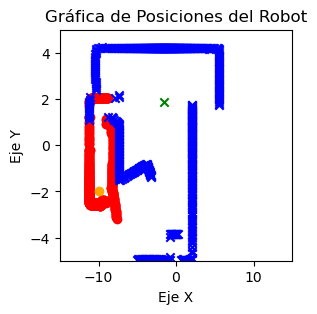

In [96]:
print_two_cloud_points(1,list_closest[1])

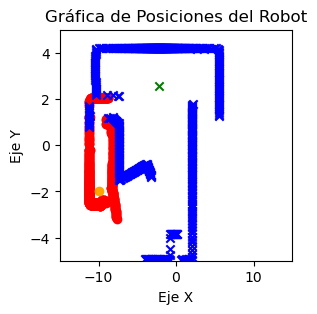

In [97]:
print_two_cloud_points(1,list_closest[2])

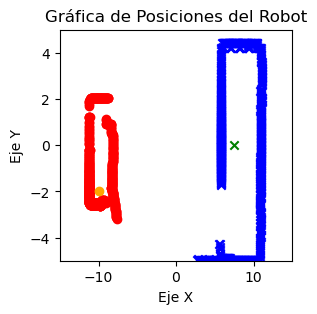

In [98]:
print_two_cloud_points(1,list_closest[3])

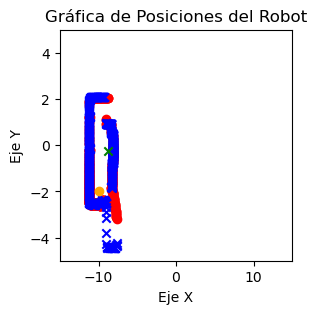

In [99]:
print_two_cloud_points(1,list_closest[4])

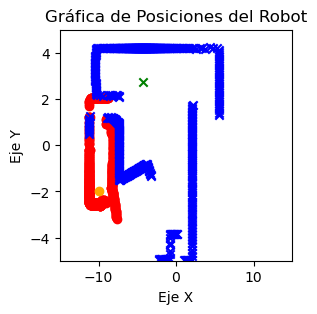

In [100]:
print_two_cloud_points(1,list_closest[5])

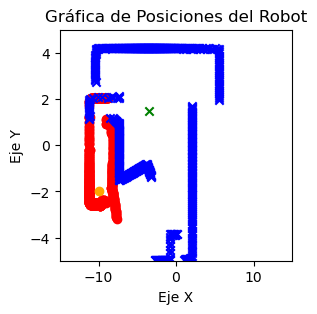

In [101]:
print_two_cloud_points(1,list_closest[6])

# 10. Reducción de dimensión por PCA

In [102]:
from sklearn.decomposition import PCA
import numpy as np

np.random.seed(42) # Para reproducibilidad
X =  model.cloud_embeddings(torch.tensor(range(num_clouds), dtype=torch.long)).detach().numpy()

# Inicializar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)

# Ajustar y transformar los datos
X_reduced = pca.fit_transform(X)

In [103]:
print(X_reduced.shape)

(892, 2)


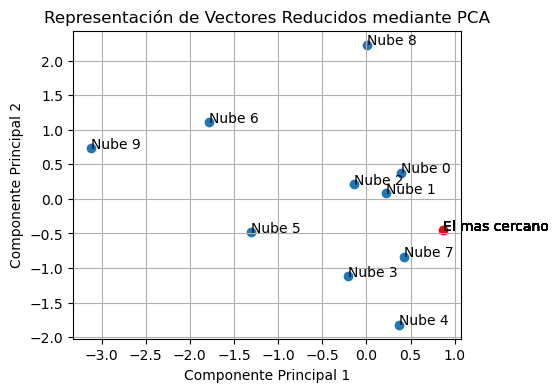

In [104]:
import matplotlib.pyplot as plt

# Suponer que tenemos un arreglo de nombres para cada punto
names = np.array(["Nube {}".format(i) for i in range(10)])

# Crear una gráfica de los puntos reducidos
plt.figure(figsize=(5, 4))
plt.scatter(X_reduced[:10, 0], X_reduced[:10, 1])
plt.scatter(X_reduced[list_closest[1], 0], X_reduced[list_closest[1], 1], color='red')

# Anotar cada punto con su nombre correspondiente
for i, name in enumerate(names):
    plt.annotate(name, (X_reduced[i, 0], X_reduced[i, 1]))
    plt.annotate("El mas cercano", (X_reduced[list_closest[1], 0], X_reduced[list_closest[1],1]))


plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Representación de Vectores Reducidos mediante PCA')
plt.grid(True)
plt.show()

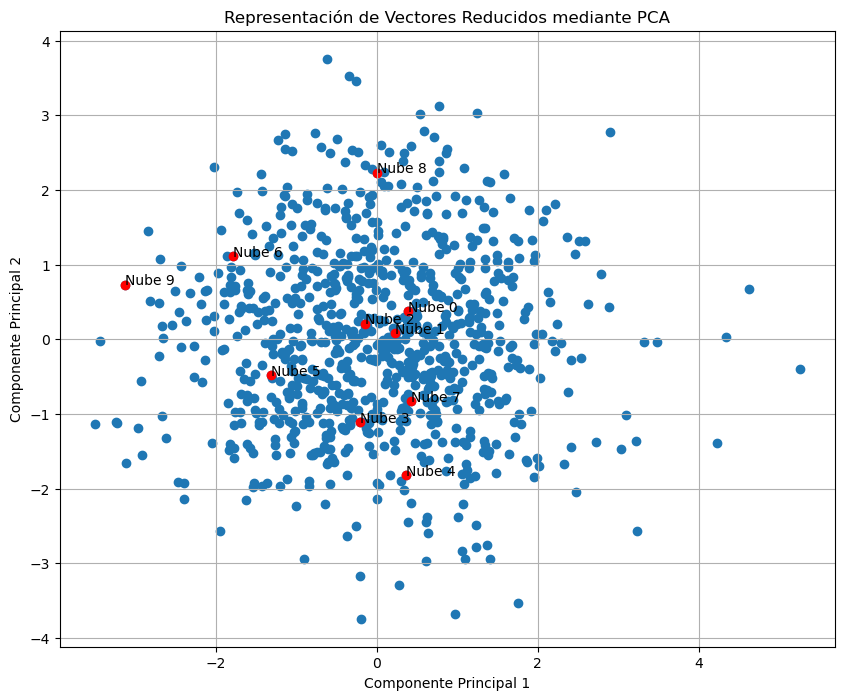

In [105]:
import matplotlib.pyplot as plt


# Crear una gráfica de los puntos reducidos
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])

# Anotar cada punto con su nombre correspondiente
for i, name in enumerate(names):
    plt.scatter(X_reduced[i, 0], X_reduced[i, 1], color="red")
    plt.annotate(name, (X_reduced[i, 0], X_reduced[i, 1]))

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Representación de Vectores Reducidos mediante PCA')
plt.grid(True)
plt.show()